# Machine Learning

## Regresión Lineal

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

In [4]:
vehiculos = pd.read_csv("data/vehiculos_procesado.csv", 
                 usecols=["consumo", "co2", "cilindros","desplazamiento"])


litros_por_galon =  3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo



In [5]:
vehiculos.shape

(35539, 5)

In [6]:
vehiculos.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


El modelo de regresión lineal mediante OLS (ordinary least squares) tiene la forma:

                                𝑦̂ =𝛼+𝛽1∗𝑥1+𝛽2∗𝑥2+...+𝛽𝑛∗𝑥𝑛+𝜀

Donde **𝑦̂** es la predicción que queremos hacer, **𝛼** es el término independiente, **𝛽𝑛** es un vector de coeficientes y **𝑥𝑛** son los valores de las variables del dataset. El objetivo es obtener **𝛼** y **𝛽𝑛** tales que error cuadrático (residuo) , definido como:

                                𝑅𝑆𝑆=𝜀²=∑𝑖=1𝑛(𝑦𝑖−(𝛼−𝛽𝑖𝑥𝑖))2

sea el mínimo.

Para ello tenemos que resolver las siguientes equaciones

                                   𝛼̂ =𝑦¯−𝛽̂ ∗𝑥¯ 
                                   𝛽̂ =(𝑋𝑇𝑋)−1𝑋𝑇𝑦 

Para obtener los coeficientes del modelo dedicamos una fracción del dataset a entrenar y otra a evaluar los resultados (para evitar sobreajuste o sobregeneralización)

In [7]:
pct_entrenamiento = 0.8

In [8]:
vehiculos_training = vehiculos.sample(frac=pct_entrenamiento)


vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_training.index)]

print(vehiculos_training.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [9]:
variables_independientes = ['desplazamiento', 'cilindros','consumo_litros_milla']
variable_dependiente = 'co2'
X = vehiculos_training[variables_independientes].as_matrix()
y = vehiculos_training[variable_dependiente].as_matrix()
X_T = X.T

In [10]:
X

array([[ 3.        ,  6.        ,  0.22267118],
       [ 2.3       ,  4.        ,  0.1892705 ],
       [ 4.6       ,  8.        ,  0.22267118],
       ..., 
       [ 4.        ,  6.        ,  0.23658813],
       [ 3.5       ,  6.        ,  0.17206409],
       [ 4.        ,  6.        ,  0.22267118]])

In [11]:
y

array([ 522.76470588,  444.35      ,  522.76470588, ...,  555.4375    ,
        404.        ,  522.76470588])

In [12]:
betas = np.linalg.inv(X_T @ X) @ X_T @ y
betas

array([  3.80838904e+00,  -5.70542774e-01,   2.30456073e+03])

In [13]:
y.mean()

470.2158237567628

In [14]:
alfa = y.mean() - np.dot(betas,vehiculos_training[variables_independientes].mean().as_matrix())
alfa

0.36967670324844448

In [15]:
def predecir(r):
    return alfa + np.dot(betas, r.values)

In [16]:
vehiculos_training["co2_pred"] = vehiculos_training[variables_independientes].apply(
    predecir, axis=1)
vehiculos_test["co2_pred"] = vehiculos_test[variables_independientes].apply(predecir, axis=1)

/home/manumonforte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
model_formula = "y ~ {alfa:.3f} + {beta_1:.2f}*desplazamiento + {beta_2:.2f}*cilindros + {beta_3:.3f}*consumo_litros_milla".format(
    alfa=alfa, beta_1=betas[0], beta_2=betas[1], beta_3=betas[2])
model_formula

'y ~ 0.370 + 3.81*desplazamiento + -0.57*cilindros + 2304.561*consumo_litros_milla'

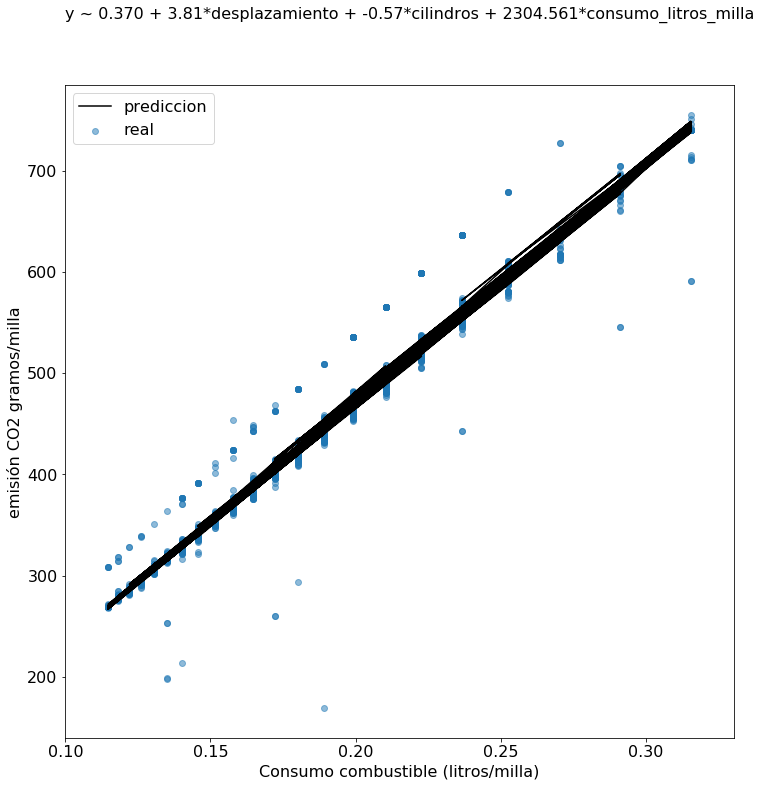

In [18]:
plt.scatter(vehiculos_test.consumo_litros_milla, vehiculos_test.co2, alpha=0.5, label="real")
plt.text(0.1, 850, model_formula)
plt.plot(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred, c="black", label="prediccion")
plt.xlabel("Consumo combustible (litros/milla)")
plt.ylabel("emisión CO2 gramos/milla")
plt.legend();

In [19]:
def error_cuadrático_medio(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [20]:
error_training = error_cuadrático_medio(vehiculos_training.co2, vehiculos_training.co2_pred)
error_training

130.62020690942956

In [21]:
error_test = error_cuadrático_medio(vehiculos_test.co2, vehiculos_test.co2_pred)
error_test

134.17869470242428

### Regresion Lineal con sklearn

Para prácticar el Análisis Exploratorio de Datos, vamos a usar una versión modificada del dataset [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) que contiene información sobre películas, información relacionada con el éxito de dichas películas en cuanto a popularidad y venta de entradas.

El dataset se encuentra en el archivo `data/movies.csv`, y consta de las siguientes columnas:

```
    belongs_to_collection (franquicia): Nombre de la franquicia a la cual pertenece la película.
    budget (presupuesto): Presupuesto de la película en dólares.
    genres (genero): Género de la pelicula.
    homepage (pagina_web): Página Web oficial de la película.
    imdb_id: ID de la película en IMDB.
    original_language (lenguaje): El lenguage original en el que se rodó la película.
    overview: Descripción de la película.
    popularity (popularidad): Puntuación de Popularidad.
    poster_path (poster): url del poster de la película
    production_companies (productores): Lista de compañias que produjeron la pelicula
    production_countries (pais): Pais de produccion de la película
    release_date (fecha_estreno): Fecha del estreno  de la película
    revenue (ventas): Ventas de entradas en dólares de la película.
    runtime (duracion): Duración en minutos de la película.
    status (estado): Estado de la película (estrenada, en producción, etc).
    tagline: Frase descriptiva de la película.
    title (titulo): Título de la película.
    vote_average (puntuacion): Puntuación media de la película.
    vote_count (n_votos): Número de votos.
```



Vamos a usar el dataset de películas. Para este ejercicio la variable objetivo es las ventas en taquilla de la película (la columna `revenue`)

In [22]:
pelis = pd.read_csv("data/movies.csv")
pelis.head()

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,NaN,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,NaN,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0


In [23]:
independientes = pelis.select_dtypes([np.int64, np.float64])
dependiente = pelis["ventas"]

In [24]:
independientes = independientes.fillna(0.000)
independientes = independientes.drop("ventas",axis=1)
independientes.head()

,presupuesto,popularidad,duracion,puntuacion,n_votos
0,0.0,8.387519,106.0,5.7,173.0
1,0.0,0.894647,106.0,6.7,13.0
2,3500000.0,14.569650,91.0,7.0,513.0
3,0.0,8.963037,87.0,6.0,124.0
4,12000000.0,9.592265,92.0,6.5,767.0


In [25]:
dependiente=dependiente.fillna(0.000)
dependiente.head()

0    76578911.0
1      676525.0
2    28215918.0
3          32.0
4    41205099.0
Name: ventas, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
modelo = LinearRegression()

In [28]:
modelo.fit(X=independientes, y=dependiente)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
modelo.coef_

array([  1.22672729e+00,  -2.86142080e+05,   4.67832938e+04,
         5.69634155e+05,   6.68386505e+04])

In [30]:
pelis["ventas_pred"]=modelo.predict(independientes)

In [31]:
from sklearn import metrics

Error cuadrático absoluto

In [32]:
metrics.mean_absolute_error(pelis["ventas"].fillna(0),pelis["ventas_pred"])

19591911.25328362

Raiz error cuadrático medio

In [33]:
np.sqrt(metrics.mean_squared_error(pelis["ventas"].fillna(0),pelis["ventas_pred"]))

38585408.525871396

Coeficiente de determinación

In [34]:
metrics.r2_score(pelis["ventas"].fillna(0),pelis["ventas_pred"])

0.60483089219230468

## K vecinos más próximos (KNN)

In [37]:
from sklearn import datasets
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [41]:
cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target

In [42]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
variable_objetivo = "objetivo"

In [46]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
variables_independientes = cancer_df.drop(variable_objetivo,axis=1).columns

In [48]:
variables_independientes

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [52]:
modelo = KNeighborsClassifier()

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelo,
               X = cancer_df[variables_independientes],
               y=cancer_df[variable_objetivo],
               scoring="roc_auc").mean()

0.99273441115305339